<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP-AAPT-Workshop-2024/blob/main/Notebooks/01_introduction_to_histograms_AAPT_workshop.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Check to see if GPU is installed.  

Generate two random matrix objects that are 7000 x 7000 items.

Multiply the matricies together using the CPU.

Repeat the multiplication using the GPU if available.

Compare the results (if possible) and summarize.

In [10]:
import tensorflow as tf
import time

# Check if GPU is available
gpu_available = tf.config.list_physical_devices('GPU')
print("Is GPU available? ", gpu_available)

# Define a function to perform matrix multiplication
def matrix_multiplication(device):
    with tf.device(device):
        # Generate random matrices
        matrix1 = tf.random.uniform((7000, 7000))
        matrix2 = tf.random.uniform((7000, 7000))
                # Perform matrix multiplication
        start_time = time.time()
        result = tf.matmul(matrix1, matrix2)
        end_time = time.time()

    return end_time - start_time

# Measure time taken on CPU
cpu_time = matrix_multiplication('/CPU:0')
print(f"Time taken on CPU: {cpu_time:.4f} seconds")

# Measure time taken on GPU
if gpu_available:
    gpu_time = matrix_multiplication('/GPU:0')
    print(f"Time taken on GPU: {gpu_time:.4f} seconds")
else:
    print("No GPU available")

# Compare the results
if gpu_available:
    speedup = cpu_time / gpu_time
    print(f"Speedup with GPU: {speedup:.2f}x")

Is GPU available?  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
Time taken on CPU: 10.1244 seconds
Time taken on GPU: 0.0003 seconds
Speedup with GPU: 37087.13x


**A more interesting example**

Calculate a portion of the Mandelbrot set using both the CPU and GPU.

Time taken on CPU: 13.1073 seconds
Time taken on GPU: 2.0792 seconds


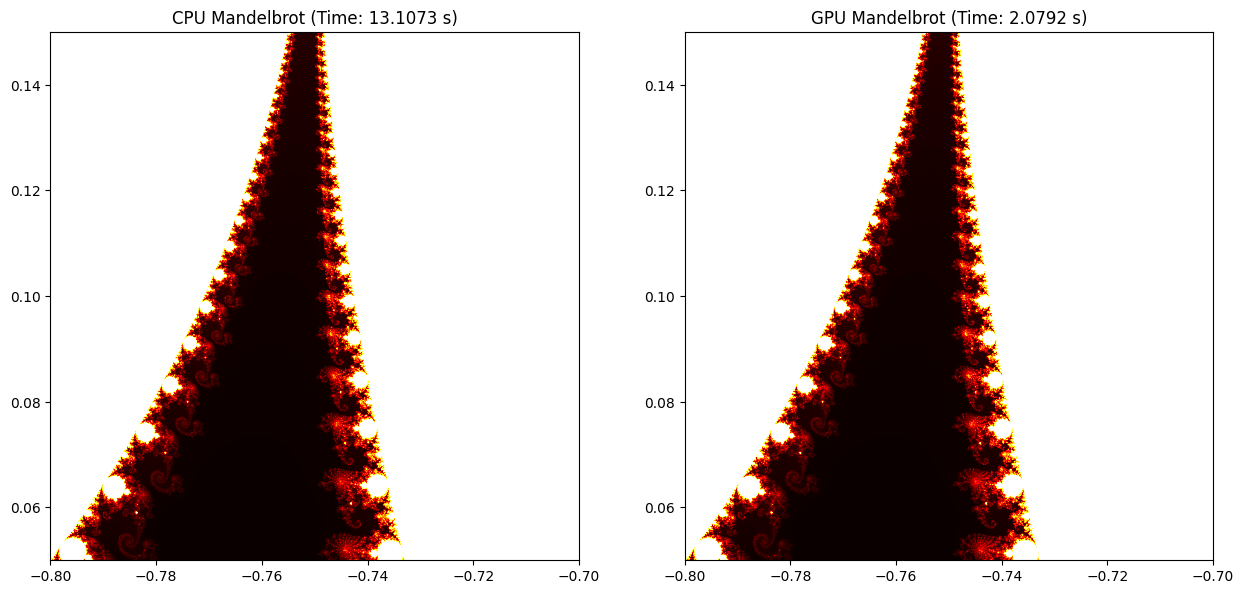

In [9]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import time

# Function to compute the Mandelbrot set with iteration counts
def mandelbrot(c, max_iter):
    z = c
    counts = tf.zeros_like(c, dtype=tf.int32)
    for n in range(max_iter):
        not_diverged = tf.abs(z) < 4
        counts += tf.cast(not_diverged, tf.int32)
        z = tf.where(not_diverged, z*z + c, z)
    return counts

# Function to generate the Mandelbrot set
def generate_mandelbrot(device, width, height, x_min, x_max, y_min, y_max, max_iter):
    with tf.device(device):
        x = tf.linspace(x_min, x_max, width)
        y = tf.linspace(y_min, y_max, height)
        X, Y = tf.meshgrid(x, y)
        C = tf.complex(X, Y)
        Z = mandelbrot(C, max_iter)
    return Z.numpy()

# Parameters for the zoomed-in Mandelbrot set
width, height = 1000, 1000
x_min, x_max = -0.8, -0.7
y_min, y_max = 0.05, 0.15
max_iter = 1000

# Generate and measure time on CPU
start_time = time.time()
cpu_mandelbrot = generate_mandelbrot('/CPU:0', width, height, x_min, x_max, y_min, y_max, max_iter)
cpu_time = time.time() - start_time
print(f"Time taken on CPU: {cpu_time:.4f} seconds")

# Generate and measure time on GPU
if gpu_available:
    start_time = time.time()
    gpu_mandelbrot = generate_mandelbrot('/GPU:0', width, height, x_min, x_max, y_min, y_max, max_iter)
    gpu_time = time.time() - start_time
    print(f"Time taken on GPU: {gpu_time:.4f} seconds")
else:
    gpu_mandelbrot = None
    print("No GPU available")

# Plot the results
fig, axes = plt.subplots(1, 2, figsize=(15, 7))

axes[0].imshow(cpu_mandelbrot, extent=[x_min, x_max, y_min, y_max], cmap='hot')
axes[0].set_title(f'CPU Mandelbrot (Time: {cpu_time:.4f} s)')

if gpu_available:
    axes[1].imshow(gpu_mandelbrot, extent=[x_min, x_max, y_min, y_max], cmap='hot')
    axes[1].set_title(f'GPU Mandelbrot (Time: {gpu_time:.4f} s)')
else:
    axes[1].set_visible(False)

plt.show()
